In [1]:
def nonintbinspectra(wvl, flux, uncer, N):
    wvllog = np.log(wvl)
    N1 = int(N)
    N3 = int(N)
    n = N - N1
    n0 = N - N1
    N2 = int(np.ceil(N))
    i = 0
    k = 0
    obl = wvllog[i+1] - wvllog[i]
    obr = float(obl)/2
    nbl = obl*N
    nbr = float(nbl)/2
    brdiff = nbr - obr
    newbins = []
    newflux = []
    newuncer = []
    nbnctr = wvllog[i] + brdiff
    newbins.append(np.exp(nbnctr))
    newflux.append(flux[i:i + N1].sum() + n * flux[i + N1])
    newuncer.append(np.sqrt(np.sum(np.square(uncer[i:i + N1])) + np.square(n * uncer[i + N1])))
    while i < len(wvllog) - np.ceil(N) - N1:
        i = i + N1
        k = k + N3
        N1 = int(N - (1 - n)) + 1
        N3 = int(N - (1 - n0)) + 1
        n0 = N - (N1 - n0)
        nbnctr +=  (1 - n) * (wvllog[i+1] - wvllog[i])  + wvllog[i + N1] - wvllog[i + 1] + n0 * (wvllog[i + N1] - wvllog[i + N1 - 1])
        newbins.append(np.exp(nbnctr))
        newflux.append((1 - n) * flux[i] + flux[i + 1:i + N1].sum() + n0 * flux[i + N1])
        newuncer.append(np.sqrt(np.square((1 - n) * uncer[i]) + np.sum(np.square(uncer[i + 1:i + N1])) + np.square(n0 * uncer[i + N1])))
        n = N - (N1 - n)
    return np.array(newbins), np.array(newflux), np.array(newuncer)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import array

In [65]:
f = np.ones(100)
wl = np.arange(1., 3., 0.02)
w = np.exp(wl)
#f[20:21] = 2
#f[30:31] = 1.5
#f[40:41] = 0
#f[50:51] = 1.5
#f[60:61] = 2
f[70:71] = 0

In [66]:
f.shape, w.shape

((100,), (100,))

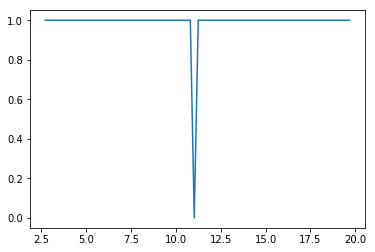

In [67]:
plt.plot(w,f)

In [68]:
ns = nonintbinspectra(w, f, f, 6.4)

In [69]:
w2 = ns[0]
f2 = ns[1]

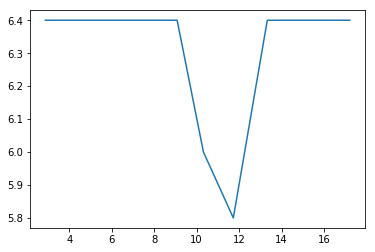

In [70]:
plt.plot(w2, f2)

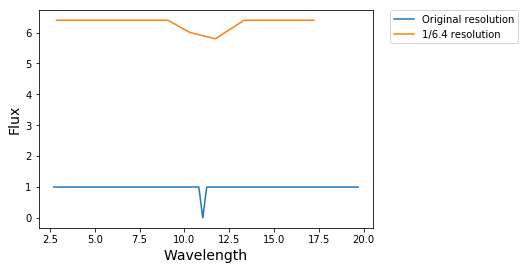

In [71]:
plt.plot(w, f, label="Original resolution")
plt.plot(w2, f2, label="1/6.4 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [74]:
f2.mean()

6.333333333333335